In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


In [3]:
import keras


In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.preprocessing import image

In [5]:
from keras import backend as K

In [8]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import opendatasets as od

In [10]:
od.download(
    "https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narenpopale
Your Kaggle Key: ··········


100%|██████████| 427M/427M [00:14<00:00, 30.9MB/s]


In [11]:
img_width,img_height=150,150
train_data_dir='/content/waste-classification-data/DATASET/TEST'
test_data_dir='/content/waste-classification-data/DATASET/TRAIN'
epochs=50
nb_train_samples=1000
nb_validation_sample=100
batch_size=20

In [12]:
if K.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 2513 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [16]:
classifier = Sequential()
classifier.add(Convolution2D(32 ,kernel_size=(3,3), input_shape=input_shape,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64 ,kernel_size=(3,3),activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64,activation="relu"))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(1, activation='sigmoid'))

In [17]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [18]:
model=classifier.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_validation_sample//batch_size
)

<ipython-input-18-64a3ec3bee24>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model=classifier.fit_generator(


Epoch 1/50
50/50 [==============================] - 19s 160ms/step - loss: 0.5445 - accuracy: 0.7895 - val_loss: 0.4579 - val_accuracy: 0.8100
Epoch 2/50
50/50 [==============================] - 7s 130ms/step - loss: 0.3233 - accuracy: 0.8730 - val_loss: 0.7436 - val_accuracy: 0.7500
Epoch 3/50
50/50 [==============================] - 8s 154ms/step - loss: 0.2760 - accuracy: 0.8770 - val_loss: 0.4831 - val_accuracy: 0.8000
Epoch 4/50
50/50 [==============================] - 7s 138ms/step - loss: 0.2620 - accuracy: 0.9043 - val_loss: 0.5827 - val_accuracy: 0.7700
Epoch 5/50
50/50 [==============================] - 7s 130ms/step - loss: 0.2951 - accuracy: 0.8990 - val_loss: 0.5522 - val_accuracy: 0.7600
Epoch 6/50
50/50 [==============================] - 7s 129ms/step - loss: 0.2756 - accuracy: 0.9013 - val_loss: 0.7061 - val_accuracy: 0.7700
Epoch 7/50
50/50 [==============================] - 8s 154ms/step - loss: 0.2322 - accuracy: 0.9100 - val_loss: 0.5200 - val_accuracy: 0.8000
Epoch

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [20]:
classifier.save("keras_model.h5")

In [21]:
from keras.models import load_model

In [27]:
import keras.utils as image

In [22]:
model=load_model("keras_model.h5")

In [23]:
classifier.save_weights("first-attempt.h5")

In [39]:
img_pred=image.load_img('/content/waste-classification-data/DATASET/TEST/R/R_10000.jpg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [40]:
result=classifier.predict(img_pred)
if(result[0][0]==1):
  prediction="recyclable"
else:
  prediction="non recyclable"
print(prediction)

1/1 [==============================] - 0s 20ms/step
recyclable


In [42]:
img_pred=image.load_img('/content/waste-classification-data/DATASET/TEST/O/O_12568.jpg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [43]:
result=classifier.predict(img_pred)
if(result[0][0]==1):
  prediction="recyclable"
else:
  prediction="non recyclable"
print(prediction)

1/1 [==============================] - 0s 18ms/step
non recyclable


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

recyclable


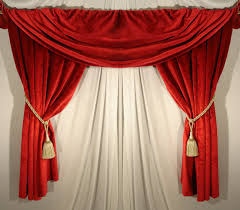

In [41]:
from PIL import Image
img=Image.open('/content/waste-classification-data/DATASET/TEST/R/R_10000.jpg')
print(prediction)
display(img)

non recyclable


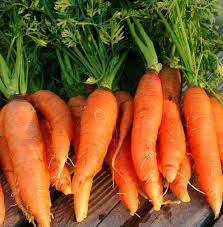

In [44]:
img=Image.open('/content/waste-classification-data/DATASET/TEST/O/O_12568.jpg')
print(prediction)
display(img)